In [20]:
import pandas as pd
import matplotlib as plt
import json
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [10]:
df_temp = pd.read_csv('temporary_results.csv', header=0)

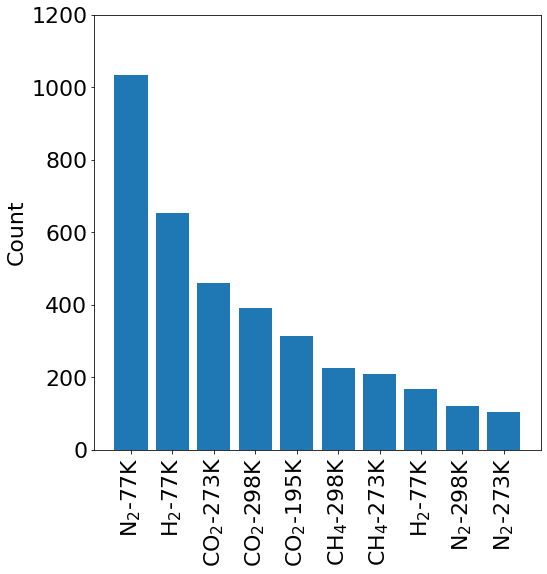

In [33]:
df_temp_sorted = df_temp.groupby(['adsorbate', 'T']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)
df_temp_plot = df_temp_sorted[df_temp_sorted['count'] > 100]

fig, ax = plt.subplots(figsize=(8, 8))
labels = [r"N$_2$-77K", r"H$_2$-77K", r"CO$_2$-273K", r"CO$_2$-298K", r"CO$_2$-195K", 
          r"CH$_4$-298K", r"CH$_4$-273K", r"H$_2$-77K", r"N$_2$-298K", r"N$_2$-273K"]


ax.bar(np.arange(10), df_temp_plot['count'])
ax.set_xticks(np.arange(10))
ax.set_xticklabels(labels, rotation=90, fontsize=22)
ax.set_ylabel('Count', fontsize=22)
ax.set_yticks([0, 200, 400, 600, 800, 1000, 1200])
ax.set_yticklabels([0, 200, 400, 600, 800, 1000, 1200], fontsize=22)
fig.savefig("Distributions_of_isotherms_by_adsorbate_and_temperature.png", dpi=600, bbox_inches='tight')

In [28]:
df_sa = df_temp[['CSD Ref code assignment (ref code/one)', 'BET SA', 'Langmuir SA']]

df_sa.dropna(subset=['CSD Ref code assignment (ref code/one)'], inplace=True)

df_sa.drop_duplicates(subset=['CSD Ref code assignment (ref code/one)'], inplace=True)

<ipython-input-28-62384a7845e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa.dropna(subset=['CSD Ref code assignment (ref code/one)'], inplace=True)
<ipython-input-28-62384a7845e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa.drop_duplicates(subset=['CSD Ref code assignment (ref code/one)'], inplace=True)


In [29]:
import numpy as np

final_ref = []
final_sa = []

refs = df_sa['CSD Ref code assignment (ref code/one)'].tolist()
bets = df_sa['BET SA'].tolist()
langmuirs = df_sa['Langmuir SA'].tolist()
langmuir_subset = []
for i, j, k in zip(refs, bets, langmuirs):
    if ' ' in i:
        continue
    else:
        if np.isnan(j) and not np.isnan(k):
            #print(i, j, k)
            langmuir_subset.append(i)
            final_ref.append(i)
            final_sa.append(k)
        elif np.isnan(j) and np.isnan(k):
            continue
        else:
            final_ref.append(i)
            final_sa.append(j)
            
print(final_ref)            
print(final_sa)

['IYOWID', 'WEBREC', 'TEMPAE', 'TEMPEI', 'LIDWIG', 'CUVWEW', 'DEYVUA', 'EBEWOZ01', 'YEYBOV', 'ZUCKIT', 'POBMOJ01', 'IGINIX', 'IGINOD', 'PUYREH', 'TIRQOB', 'RUGZAW', 'XIGFOJ', 'ALAMUW', 'PUSDIR', 'CIFMIP', 'CIFMEL', 'CIFMAH', 'CIFLUA', 'BUYDAC', 'BUYDEG', 'LASYOU', 'MIHHAN', 'UMEMAB', 'FULYIW', 'LODTEF01', 'BAKJEE', 'BAKJOO', 'XITYOP', 'BOVHEB', 'QIHXIQ', 'VETMIS', 'QOTBAE', 'TIVHAJ', 'SAKNOJ', 'CUYWUP', 'FECZAQ', 'FECYOD', 'FECYUJ', 'EFESEP', 'EFESIT', 'EFESOZ', 'ZARZAV', 'MARNOK', 'LEVLEF', 'MUDKOM', 'AHORAR', 'GAGZEV', 'QOCBEQ', 'FANWOI', 'ECASOS', 'CENPUI', 'CENQAP', 'VICLAW', 'REWNEO', 'AHOLAM', 'CIJBEE', 'VUMBOW', 'VUMBIQ', 'TISHAF', 'KEDQAN', 'XIFHIF', 'DUBXOP', 'QOPZIF', 'ZUJKAS', 'HIYGIH', 'ACUFEK', 'JAMSIC', 'JAMSOI', 'BUBJUF', 'NUVYEK', 'NUVXOT', 'NUVYIO', 'NUVYAG', 'YUGLES', 'CUGXAF', 'NOKLIJ', 'KACZIZ', 'KACZEV', 'VITHIR', 'YUVSUE', 'EQERAU', 'DAZCAK', 'ECOLEP', 'NIMXIS', 'VEBHUG', 'BIDPOV', 'XUBGUY', 'TONQOD', 'AHOZII', 'COJHIT', 'YIJYOH', 'LASDEQ', 'TISPAO', 'KANMIX', 'QO